<a href="https://colab.research.google.com/github/shinmiura/diveintocode-ml/blob/master/%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.このSprintについて

**Sprintの目的**

・スクラッチを通して線形回帰を理解する

・オブジェクト指向を意識した実装に慣れる

・数式をコードに落とし込めるようにする

**どのように学ぶか**

スクラッチで線形回帰を実装した後、学習と検証を行なっていきます。

# 2.線形回帰スクラッチ

線形回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。

以下に雛形を用意してあります。このScratchLinearRegressionクラスにコードを書き加えていってください。



In [ ]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
        
    def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
        X = np.hstack([a, X])

        pred_y = _linear_hypothesis(X)
        return pred_y


【問題1】仮定関数

以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。

$$
h_\theta(x) =  \theta_0 x_0 + \theta_1 x_1 + ... + \theta_j x_j + ... +\theta_n x_n  (x_0 = 1)\\
$$


$x$ : 特徴量ベクトル


$\theta$ : パラメータベクトル


$n$ : 特徴量の数


$x_j$ : j番目の特徴量


$\theta_j$ : j番目のパラメータ（重み）


特徴量の数$n$は任意の値に対応できる実装にしてください。


なお、ベクトル形式で表すと以下のようになります。


$$
h_\theta(x) = \theta^T \cdot x.
$$



In [1]:
# ライブラリのインポート
import numpy as np
from numpy.random import *
import random

In [ ]:
# 問題６の箇所に解答しました。以下は、検算などのための記録です。

In [2]:
# 雛形
# クラスの外から呼び出すことがないメソッドのため、Pythonの慣例としてアンダースコアを先頭にひとつつけています。
def _linear_hypothesis(self, X):
    """
    線形の仮定関数を計算する
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果
    """
    # x_{0} = 1のため、行列の積の計算において考慮すべく全て
    a = np.ones(X.shape[0]).reshape(X.shape[0], 1) #１次元配列なので、reshape(Xの列数＋１（列が全て１の列）,1)により２次元配列化している
    X = np.hstack([a, X])
    self.Theta = np.random.ramdom_sample((X.shape[0] + 1, 1))
    self.y = self.Theta @ X.T
    return self.y

In [3]:
X = np.arange(10).reshape(2, -1)
X

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [4]:
a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
a

array([[1.],
       [1.]])

In [5]:
X = np.hstack([a, X])
X

array([[1., 0., 1., 2., 3., 4.],
       [1., 5., 6., 7., 8., 9.]])

In [6]:
theta = np.zeros(X.shape[1])
print(theta)
theta = theta.reshape(X.shape[1], 1)
print(theta)
# self.theta2 = np.zeros(X_val.shape[1])
# self.theta2 = self.theta2.reshape(1, X_val.shpae[1])

[0. 0. 0. 0. 0. 0.]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [7]:
theta = np.array([])
theta

array([], dtype=float64)

【問題2】最急降下法

最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fitメソッドから呼び出すようにしてください。

$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]
$$


$\alpha$ : 学習率


$i$ : サンプルのインデックス


$j$ : 特徴量のインデックス
 


In [ ]:
# 問題６の箇所に解答しました。以下は、検算などのための記録です。

In [8]:
# 雛形
# ScratchLinearRegressionクラスへ以下のメソッドを追加してください。コメントアウト部分の説明も記述してください。

def _gradient_descent(self, X, error):
    """
    最急降下法によるパラメータの更新
    適当な重みを掛けてθが最小値の方に動いていくようにする
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    Returns
    -------
    Theta : 次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果
    """
    self.Theta = self.Theta - 0.01 * ((self.error * X).sum()) / X.shape[0]
    return self.Theta

In [9]:
x = np.linspace(1,6,5)
X = np.c_[np.ones(5),x]#入力データX
print(x)
print(X)

[1.   2.25 3.5  4.75 6.  ]
[[1.   1.  ]
 [1.   2.25]
 [1.   3.5 ]
 [1.   4.75]
 [1.   6.  ]]


In [10]:
y = 2*x + 1#適当な真のモデル
y

array([ 3. ,  5.5,  8. , 10.5, 13. ])

In [11]:
theta = [0,0]#仮定関数の係数の初期値
y_pred = X @ theta

In [12]:
error = y_pred - y#入力データerror

In [13]:
h = X @ theta
lr = 0.05
m = X.shape[0]
n = X.shape[1]
# 特徴量の数だけfor文を回す
for j in range(n):
  # gradientの初期値を設定
  gradient = 0
  # サンプル数分だけfor文を回す
  for i in range(m):
    gradient += (h[i] - y[i]) * X[i, j]
    theta[j] = theta[j] - lr * (gradient / m)
print(theta)

[0.9500000000000001, 3.2625]


雛形として用意されたメソッドや関数以外でも必要があれば各自作成して完成させてください。雛形を外れても問題ありません。

【問題3】推定

推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。


仮定関数 $h_\theta(x)$ の出力が推定結果です。



In [ ]:
# 問題６の箇所に解答しました。

【問題4】平均二乗誤差

線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。


平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。


平均二乗誤差は以下の数式で表されます。

$
L(\theta)=  \frac{1}{m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$



$m$ : 入力されるデータの数


$h_\theta()$ : 仮定関数


$x^{(i)}$ : i番目のサンプルの特徴量ベクトル


$y^{(i)}$ : i番目のサンプルの正解値


なお、最急降下法のための目的関数（損失関数）としては、これを2で割ったものを使用します。（問題5, 9）




〈計算順序（ヒント集より）〉

①推定結果を計算
$$
h_\theta(x_i) = \theta^T \cdot x_i
$$

②実測値との差を計算
$$
error_i = h_\theta(x_i) - y_i
$$

③上記②の二乗を計算
$$
squared error_i = error_i^2
$$

④上記③の合計値を計算
$$
sum squared error = \sum_{i=1}^{m} squared error_i
$$

⑤データの長さで割って４の平均値を計算
$$
mean squared error = \sum_{i=1}^{m} squared error_i
$$

In [2]:
# 問題4解答（他の問題は問題6に含めて解答していますが、問題4のみこちらに記載しています。)
def MSE(y_pred, y):
    """
    平均二乗誤差の計算
    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値
    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    error = 0
    for i in range(len(y_pred)):
      error += ((y_pred[i] - y[i]) ** 2)
    # データの長さで割る(ヒント集より。合計してから割るのだからインデントはfor文と同じところまで戻す)
    mse = error / len(y_pred)
    return mse

In [3]:
# 作成した関数に、下記の変数を引数として与えてみる(期待される出力は、戻り値15.166666666666666。ヒント集の数値は間違いなので気を付ける！)。
y_pred = np.array([0,1,2,3,4,5])
y = np.array([1,3,5,7,9,11])

print('MSEは、{}'.format(MSE(y_pred, y)))

MSEは、15.166666666666666


In [4]:
# 検算用
from sklearn.metrics import mean_squared_error
y_true = np.array([1,3,5,7,9,11])
y_pred = np.array([0,1,2,3,4,5])
mean_squared_error(y_true, y_pred)

15.166666666666666

【問題5】目的関数

以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。


目的関数（損失関数） $J(\theta)$ は次の式です。
$$
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$


$m$ : 入力されるデータの数


$h_\theta()$ : 仮定関数


$x^{(i)}$ : i番目のサンプルの特徴量ベクトル


$y^{(i)}$ : i番目のサンプルの正解値

〈ヒント集より〉

平均二乗誤差をさらに2で割った式になります。最小化させるべき目的の関数という意味で目的関数と呼ばれます。

In [ ]:
# 問題６の箇所に解答しました。以下は、検算などのための記録です。

In [5]:
def _loss_func(y_pred, y):
  """
  損失関数の計算
  Parameters
  ----------
  h : 
    仮定関数
  y : 次の形のndarray, shape (n_samples,)
    正解値
  Returns
  ----------
  lossfunc
    損失値
  """
  # yのサンプル数
  m2 = y.shape[0]
  error2 = 0
  for i in range(m2):
    error2 += ((y_pred[i] - y[i]) ** 2)
    # (m×2)で割る(合計してから割るのだからインデントはfor文と同じところまで戻す)
  loss = error2 / (2 * m2)
  return loss

In [6]:
y_pred = np.array([0,1,2,3,4,5])
y = np.array([1,3,5,7,9,11])
print(_loss_func(y_pred, y))

7.583333333333333


# 3.検証

【問題6】学習と推定

機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [7]:
# 必要なライブラリの読み込み（追加）
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [20]:
class ScratchLinearRegression():
    """
    線形回帰をスクラッチで実装していく
    Parameters
    ---------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """

    def __init__(self, num_iter, lr, no_bias, verbose):  # 必要に応じて引数を追加して下さい
        """
        インスタンス変数初期化
        """
        # ハイパーパラメータを属性として記録
        self.num_iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        
    # 問題6（学習と推定）
    def fit(self, X, y, X_val, y_val):  # 必要に応じて引数を追加して下さい
        """
        線形回帰の学習。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ---------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
          訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
          検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
          検証データの正解値
        """
        m_0 = X.shape[0]
        m = np.ones((m_0, 1))
        X = np.hstack((m, X))

        m2_0 = X_val.shape[0]
        m2 = np.ones((m2_0, 1))
        X_val = np.hstack((m2, X_val))
        
        # θの初期化(ヒント集7より)
        # Xが変数でありその数だけ列があり、θとXの数は同じであることから列でshapeする。
        self.theta = np.zeros(X.shape[1])
        # 1次元になっているため2次元配列化する
        self.theta = self.theta.reshape(X.shape[1], 1)

        # 損失を記録するための配列を用意(訓練データ用)
        self.loss = np.array([])
        # 損失を記録するための配列を用意(検証データ用)
        self.val_loss = np.array([])

        # メイン処理
        for i in range(self.num_iter):
            # イテレーションの回数を確認できるようにするため一旦ここでprintしておく
            print('イテレーション{}回目'.format(i))
            # 問題1（過程関数の計算）の解答をここに記載
            pred1 = self._linear_hypothesis(X)
            print(pred1)

            pred2 = self._linear_hypothesis(X_val)
            print(pred2)

            # 問題2（最急降下法によるパラメータの更新値計算）の解答をここに記載
            self._gradient_descent(X, y)
            # 問題7（学習曲線のプロット）のグラフ描画時（問題5（損失関数）で作成した関数を使用）
            loss = self._loss_func(pred1, y)
            val_loss = self._loss_func(pred2, y_val)
            self.loss = np.append(self.loss, loss)
            self.val_loss = np.append(self.val_loss, val_loss)

    # 問題1
    def _linear_hypothesis(self, X):  # 必要に応じて引数を追加して下さい
        """
        仮定関数の計算を計算する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        Returns
        -------
        次の形のndarray, shape (n_samples, 1)
        線形の仮定関数による推定結果
        """
        pred = X @ self.theta
        return pred

    # 問題2
    def _gradient_descent(self, X, y):
        """
        最急降下法によるパラメータの更新
        適当な重みを掛けてθが最小値の方に動いていくようにする
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        Returns
        -------
        Theta : 次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果
        """
        m = X.shape[0]
        n = X.shape[1]
        pred = self._linear_hypothesis(X)
        # 特徴量の数だけfor文を回す
        for j in range(n):
          # gradientの初期値を設定
          gradient = 0
          # サンプル数分だけfor文を回す
          for i in range(m):
            gradient += (pred[i] - y[i]) * X[i, j]
          self.theta[j] = self.theta[j] - self.lr * (gradient / m) 
        # return self.theta
    
    # 問題3
    def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
        X = np.hstack([a, X])

        pred_y = self._linear_hypothesis(X)
        return pred_y
    
    # 問題5
    def _loss_func(self, pred, y):
      """
      損失関数の計算
      Parameters
      ----------
      pred : 
        仮定関数
      y : 次の形のndarray, shape (n_samples,)
        正解値
      Returns
      ----------
      lossfunc
        損失値
      """
      # yのサンプル数
      m2 = y.shape[0]
      error2 = 0
      for i in range(m2):
        error2 += ((pred[i] - y[i]) ** 2)
        # (m×2)で割る(合計してから割るのだからインデントはfor文と同じところまで戻す)
        loss = error2 / (2 * m2)
        np.append(self.loss, loss)
      return loss



In [29]:
# House Pricesコンペティションのデータ読み込み
dataset = pd.read_csv("/content/drive/MyDrive/DIC/train.csv")

# 説明変数GrLivAreaとYearBuilt、目的変数SalePriceをそれぞれ抜き出してXとyに設定
X = dataset.loc[:, ['GrLivArea', 'YearBuilt']]
y = dataset.loc[:, ['SalePrice']]
# arrayに変換
X = X.values
y = y.values

# trainデータとtestデータへの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=1234)

# 標準化
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

# スクラッチしたモデルで訓練
num_iter = 5000
lr =0.0000001
reg = ScratchLinearRegression(num_iter, lr, no_bias = True, verbose = True)
reg.fit(X_train, y_train, X_test, y_test)

# 線形回帰の推定
y_pred = reg.predict(X_test)

print('予測値：{:.3f}'.format(y_pred.mean()))

ストリーミング出力は最後の 5000 行に切り捨てられました。
 [253062.87802528]
 [179927.31702869]
 [226890.31887032]
 [234676.21966731]
 [135326.46617473]
 [210812.65485147]
 [286266.3032787 ]
 [142623.28882937]
 [204222.17013583]
 [249520.06556578]
 [140180.10110415]
 [182879.99902377]
 [344295.69366563]
 [156231.08666297]
 [181684.78321393]
 [131694.32497216]
 [146371.63750652]
 [323075.79208917]
 [137814.31827148]
 [128801.06195812]
 [232015.17133093]
 [224465.31732811]
 [160238.1282063 ]
 [196689.70123001]
 [216700.63374463]
 [191189.94842863]
 [147283.31139166]
 [177015.86783163]
 [204734.89570769]
 [252970.31798021]
 [106511.2451379 ]
 [184384.23358933]
 [123720.87386904]
 [202056.2620028 ]
 [122159.85080994]
 [161894.94261247]
 [117189.80813443]
 [202208.24102891]
 [275793.67704282]
 [161441.83629315]
 [160983.46899883]
 [136521.48171307]
 [105784.09052838]
 [202750.47581979]
 [145972.08837873]
 [241001.74918427]
 [195569.86063972]
 [193829.7795515 ]
 [196219.41008518]
 [ 95182.9324244 ]
 [175422.10425151]

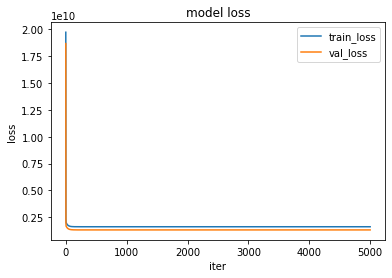

In [30]:
plt.plot(range(num_iter), reg.loss, color = 'tab:blue', label = 'train_loss')
plt.plot(range(num_iter), reg.val_loss, color = 'tab:orange', label = 'val_loss')
plt.title('model loss')
plt.xlabel('iter')
plt.ylabel('loss')
# 凡例の表示
plt.legend()

In [31]:
# scikit-learnによる実装と比べ、正しく動いているかを確認
# 線形回帰モデルのライブラリ読み込み
from sklearn.linear_model import LinearRegression
# 説明変数GrLivAreaとYearBuilt、目的変数SalePriceをそれぞれ抜き出してXとyに設定
X2 = dataset.loc[:, ['GrLivArea', 'YearBuilt']]
y2 = dataset.loc[:, ['SalePrice']]
# arrayに変換
X2 = X2.values
y2 = y2.values

# trainデータとtestデータへの分割
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size=0.80, random_state=1234)

# 標準化
scaler = StandardScaler()
X2_train_std = scaler.fit_transform(X2_train)
X2_test_std = scaler.fit_transform(X2_test)

# 線形回帰モデルの初期化
lm = LinearRegression()
# モデルの学習
lm.fit(X2_train_std, y2_train)
# 学習済モデルとX2_test_stdを使った予測
y2_pred = lm.predict(X2_test_std)
lm_mse = mean_squared_error(y2_test, y2_pred)
print('LinearRegression RMSE : {}'.format(np.sqrt(lm_mse)))

LinearRegression RMSE : 43074.81177163234


In [32]:
# スクラッチした結果
reg_mse = mean_squared_error(y_test, y_pred)
print('Scratched LinearRegression RMSE : {}'.format(np.sqrt(reg_mse)))

Scratched LinearRegression RMSE : 51462.2959551292


【問題7】学習曲線のプロット

学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。

線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。



In [ ]:
# 上記問題6の箇所に解答しました。

【問題8】（アドバンス課題）バイアス項の除去

バイアス項 $\theta_0$ を抜くと学習がどう変化するか検証してください。また、線形回帰モデルにおけるバイアス項の役割の考察・調査を行ってください。

【問題9】（アドバンス課題）特徴量の多次元化

特徴量の二乗や三乗を入力に利用すると学習結果がどう変化するか検証してください。

【問題10】（アドバンス課題）更新式の導出

最急降下法の更新式は以下でした。この式が導出される過程を説明してください。


\[\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]\]
以下の式から説明をはじめることができます。


\[\theta_j := \theta_j - \frac{\partial}{\partial \theta_j}J(\theta) \\\]
目的関数（損失関数） $J(\theta)$ は次の式です。


\[J(\theta)= \frac{1 }{ 2m} \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.\]


【問題11】（アドバンス課題）局所最適解の問題

最急降下法には一般的に局所最適解の問題があります。しかし、線形回帰では学習を続ければ必ず最適解を求めることができます。それはなぜか数式やグラフを用いて説明してください。

In [ ]:
y = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
theta = np.zeros(y)